In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


# Open access from subho's google drive
GOOGLE_SHEET_ID = '1oBmEgJ4pQIp-gxD-EMOYHVgvQxqZbZ4h9RgziQ7cqDQ'


sheet_1 = pd.read_csv('https://docs.google.com/spreadsheets/d/' + 
                   GOOGLE_SHEET_ID +
                   '/export?gid=0&format=csv',
                   # Set first column as rownames in data frame
                   index_col=0
                  )
sheet_1.head(10)

,REGISTRATION/YEAR,GENDER,BIRTH WEIGHT(kg),LENGTH(cm),FOOT-LENGTH(mm),MODE OF DELIVERY,INDICATION,MATERNAL HIGH RISK FACTORS,GA LMP (weeks),GA USG(weeks),GA BALLARD(weeks)
SL NO.,,,,,,,,,,,
3,64/50624/2018,female,3.974,50.0,80.0,LSCS,polyhydramnios with scar tenderness,hypothyroidism,38.4,38.2,40.0
4,63/50624/2018,female,2.773,50.0,76.7,LSCS,prom with unfav cervix,-,38.0,37.0,38.0
5,65/50733/2018,male,2.245,50.0,70.0,LSCS,Iugr with less liquor,NaN,35.0,35.1,36.0
7,90/4818/2018,female,1.810,50.0,61.9,LSCS,NaN,NaN,32.0,31.2,32.0
8,91/4881/2018,male,3.377,50.0,79.7,LSCS,post-dated,NaN,40.0,38.2,38.0
9,103/31308/2018,male,2.367,50.0,71.8,FTND,NaN,psychiatric medication and hypothyroidism,37.5,36.0,34.0
10,106/51359/2018,female,3.166,50.0,79.3,FTND,NaN,NaN,39.2,38.2,38.0
11,109/6057/2018,male,3.025,50.0,80.1,LSCS,prom,-,39.3,38.0,40.0
12,111/51446/2018,female,2.742,50.0,75.5,LSCS,CPD,-,38.4,36.5,36.0


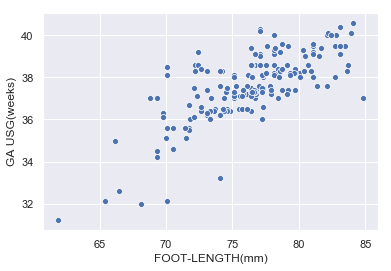

In [8]:
# sanity plots

sns.scatterplot(x="FOOT-LENGTH(mm)", y="GA USG(weeks)", data=sheet_1)

[12.08375889]
[[0.3331554]]


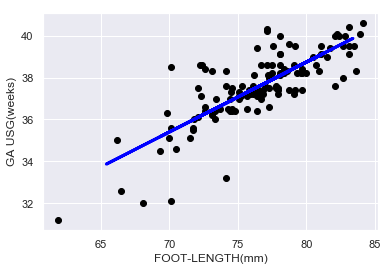

In [96]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
import numpy as np

length = 155

X = sheet_1.iloc[:, 4][:length].values 
y = sheet_1.iloc[:, 9][:length].values 
X = X.reshape(length, 1)
y = y.reshape(length, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

lr = LinearRegression()
lr.fit(X_train, y_train) 
print(lr.intercept_)  
print(lr.coef_)
y_pred = lr.predict(X_test)  

# Plot outputs
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks()
plt.yticks()

plt.ylabel("GA USG(weeks)")
plt.xlabel("FOOT-LENGTH(mm)")

plt.show()

In [80]:
#List range of GA USG
F_length = list(range(57,83))
GA_usg = [lr.coef_[0][0]*x+lr.intercept_[0] for x in F_length]
df = pd.DataFrame()
df['Foot_length'] = F_length
df['GA_USG'] = GA_usg

df.head(len(GA_usg))

,Foot_length,GA_USG
0,57,30.450678
1,58,30.824927
2,59,31.199175
3,60,31.573424
4,61,31.947673
5,62,32.321921
6,63,32.696170
7,64,33.070419
8,65,33.444667
9,66,33.818916


In [97]:
# Get correlation coeff. r between GA_USG and Foot Length

sheet_1["FOOT-LENGTH(mm)"].corr(sheet_1["GA USG(weeks)"])

0.7435132905731997

In [98]:
import scipy
#pearson's co-relation
scipy.stats.pearsonr(X_train, y_train)

(array([0.79340249]), array([4.50103446e-28]))

In [99]:
#student T test
scipy.stats.ttest_ind(X_train, y_train)

Ttest_indResult(statistic=array([98.27388375]), pvalue=array([2.05623961e-199]))

In [100]:
#bracketing data

df = sheet_1.round({"GA USG(weeks)": 0}).sort_values(["GA USG(weeks)"], ascending=[1])
df.head()

,REGISTRATION/YEAR,GENDER,BIRTH WEIGHT(kg),LENGTH(cm),FOOT-LENGTH(mm),MODE OF DELIVERY,INDICATION,MATERNAL HIGH RISK FACTORS,GA LMP (weeks),GA USG(weeks),GA BALLARD(weeks)
SL NO.,,,,,,,,,,,
7,90/4818/2018,female,1.810,50.0,61.9,LSCS,NaN,NaN,32.0,31.0,32.0
88,286/156130/2018,female,2.400,50.0,68.1,LSCS,prom with IDM,DM,38.0,32.0,34.0
129,218/54229/2018,female,1.544,50.0,70.1,LSCS,twin pregnancy,-,32.0,32.0,32.0
130,219/54230/2018,female,1.356,50.0,65.4,LSCS,twin pregnancy,-,32.0,32.0,32.0
119,443//19625/2018,female,2.330,50.0,74.1,LSCS,prom,-,31.4,33.0,33.0


In [60]:
new_df = pd.DataFrame()
new_df["GA USG(weeks)"] = df.groupby("GA USG(weeks)")["GA USG(weeks)"].mean().values
new_df["count"] = df.groupby("GA USG(weeks)")["FOOT-LENGTH(mm)"].count().values

new_df["FOOT-LENGTH(mm)_mean"]= df.groupby("GA USG(weeks)")["FOOT-LENGTH(mm)"].mean().values
new_df["FOOT-LENGTH(mm)_std"]= df.groupby("GA USG(weeks)")["FOOT-LENGTH(mm)"].std().values

new_df["BIRTH WEIGHT(kg)_mean"]= df.groupby("GA USG(weeks)")["BIRTH WEIGHT(kg)"].mean().values
new_df["BIRTH WEIGHT(kg)_std"]= df.groupby("GA USG(weeks)")["BIRTH WEIGHT(kg)"].std().values

new_df["GA LMP (weeks)_mean"]= df.groupby("GA USG(weeks)")["GA LMP (weeks)"].mean().values
new_df["GA LMP (weeks)_std"]= df.groupby("GA USG(weeks)")["GA LMP (weeks)"].std().values

new_df["GA LMP (weeks)_mean"]= df.groupby("GA USG(weeks)")["GA LMP (weeks)"].mean().values
new_df["GA LMP (weeks)_std"]= df.groupby("GA USG(weeks)")["GA LMP (weeks)"].std().values

new_df["GA BALLARD(weeks)_mean"]= df.groupby("GA USG(weeks)")["GA BALLARD(weeks)"].mean().values
new_df["GA BALLARD(weeks)_std"]= df.groupby("GA USG(weeks)")["GA BALLARD(weeks)"].std().values

new_df.head(20)

,GA USG(weeks),count,FOOT-LENGTH(mm)_mean,FOOT-LENGTH(mm)_std,BIRTH WEIGHT(kg)_mean,BIRTH WEIGHT(kg)_std,GA LMP (weeks)_mean,GA LMP (weeks)_std,GA BALLARD(weeks)_mean,GA BALLARD(weeks)_std
0,31.0,1,61.900000,NaN,1.810000,NaN,32.000000,NaN,32.000000,NaN
1,32.0,3,67.866667,2.358672,1.766667,0.556479,34.000000,3.464102,32.666667,1.154701
2,33.0,2,70.300000,5.374012,2.224500,0.149200,32.000000,0.848528,32.500000,0.707107
3,34.0,2,69.300000,0.000000,2.173000,0.212132,36.450000,0.212132,34.000000,0.000000
4,35.0,4,69.550000,2.318764,2.297250,0.248222,36.225000,1.424488,35.000000,1.154701
5,36.0,27,73.307407,2.033929,2.670111,0.266635,37.351852,0.882466,36.296296,0.912090
6,37.0,40,75.902500,2.783973,2.750825,0.278669,37.790000,1.032001,37.600000,0.928191
7,38.0,50,77.342000,3.024599,2.965100,0.355666,38.280000,0.890081,38.180000,0.628896
8,39.0,29,78.168966,2.901121,3.151379,0.356164,39.179310,0.780741,39.172414,1.136064
9,40.0,18,81.066667,2.411248,3.338889,0.342025,39.483333,1.320539,39.777778,0.942809


In [85]:
sheet_1["BIRTH WEIGHT(kg)"].corr(sheet_1["GA USG(weeks)"])

0.6955392367596779

In [115]:
fl_test = sheet_1.iloc[:, 4][155:177].values 
ga_usg_org =  sheet_1.iloc[:, 9][155:177].values 
ga_usg_model = [lr.coef_[0][0]*x+lr.intercept_[0] for x in fl_test]
ga_lmp = sheet_1.iloc[:, 8][155:177].values 

print(scipy.stats.pearsonr(ga_usg_org, ga_usg_model))
print(scipy.stats.pearsonr(ga_lmp, ga_usg_model))

ga_usg_model_err = []
i=0
for x in ga_usg_model:
    error_percent = (x - ga_usg_org[i])/ga_usg_org[i] * 100
    ga_usg_model_err.append(error_percent)
    i+=1
ga_usg_model_err

print(np.mean(ga_usg_model_err))
ga_usg_lmp_err = []
i=0
for x in ga_lmp:
    error_percent = (x - ga_usg_model[i])/ga_usg_model[i] * 100
    ga_usg_lmp_err.append(error_percent)
    i+=1
ga_usg_lmp_err
print(np.mean(ga_usg_lmp_err))

(0.334180638425569, 0.12850088391261064)
(-0.05202897533654065, 0.8181322976364249)
-1.507663407773233
2.1694590974922234
